In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
train_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')

pd.isnull(train_raw).sum() > 0


Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [145]:
train_raw.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [146]:
features=['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']
train_raw=train_raw[pd.notnull(train_raw['Arrival Delay in Minutes'])]
test_raw=test_raw[pd.notnull(test_raw['Arrival Delay in Minutes'])]
train_data=train_raw[features]
test_data=test_raw[features]
x_train=train_data.drop(['satisfaction'], axis=1)
y_train=train_data['satisfaction']
x_test=test_data.drop(['satisfaction'], axis=1)
y_test=test_data['satisfaction']
y_train.isnull().any()


False

In [184]:
x=pd.concat([x_train, x_test])
y=pd.concat([y_train, y_test])

<AxesSubplot:title={'center':'Satisfaction among the passengers'}, xlabel='Satisfaction', ylabel='Number of passengers'>

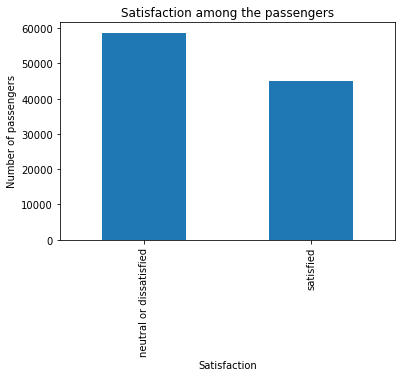

In [148]:

train_data['satisfaction'].value_counts().plot(xlabel='Satisfaction', ylabel='Number of passengers', title='Satisfaction among the passengers',kind='bar')

Description of Age:
count    103594.000000
mean         39.380466
std          15.113125
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Number of passengers based on age')

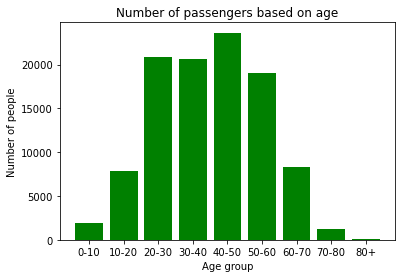

In [149]:
print("Description of Age:")
print(train_data['Age'].describe())
# train_data['Age'].value_counts().plot(xlabel='Gender', title='Demographics of Passenger based on Age',kind='bar')
age0_10=0
age10_20=0
age20_30=0
age30_40=0
age40_50=0
age50_60=0
age60_70=0
age70_80=0
age80__=0
for x in train_data['Age']:
    if x<10:
        age0_10+=1
    elif x>=10 and x<20:
        age10_20+=1
    elif x>=20 and x<30:
        age20_30+=1
    elif x>=30 and x<40:
        age30_40+=1
    elif x>=40 and x<50:
        age40_50+=1
    elif x>=50 and x<60:
        age50_60+=1
    elif x>=60 and x<70:
        age60_70+=1
    elif x>=70 and x<80:
        age70_80+=1
    else:
        age80__+=1
agegroup=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80+']
agepop=[age0_10,age10_20,age20_30,age30_40,age40_50,age50_60,age60_70,age70_80,age80__]
plt.bar(agegroup, agepop, color='green')
plt.ylabel('Number of people')
plt.xlabel('Age group')
plt.title('Number of passengers based on age')

<AxesSubplot:>

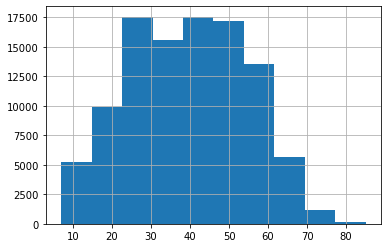

In [150]:
train_data['Age'].hist()

<AxesSubplot:title={'center':'Demographics of Passenger based on Gender'}, ylabel='Gender'>

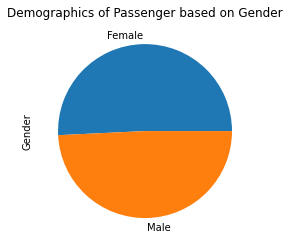

In [151]:

train_data['Gender'].value_counts().plot(xlabel='Gender', title='Demographics of Passenger based on Gender',kind='pie')

In [152]:
x_train['Gender'] = x_train['Gender'].replace({'Male':0,'Female':1})
x_train['Type of Travel'] = x_train['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
x_train['Customer Type'] = x_train['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
x_train['Class'] = x_train['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
# y_train['satisfaction'] = y_train['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1})

x_test['Gender'] = x_test['Gender'].replace({'Male':0,'Female':1})                                                          
x_test['Type of Travel'] = x_test['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
x_test['Customer Type'] = x_test['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
x_test['Class'] = x_test['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
# y_test['satisfaction'] = y_test['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1})

In [153]:
y_train

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns

Accuracy Score using MLP Classifier: 0.92797281118449
Confusion Matrix: 


[Text(0.5, 1.0, 'Confusion Matrix for MLP Classifier')]

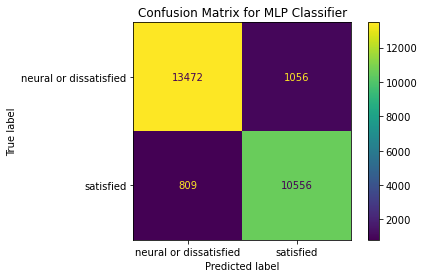

In [170]:
clf=MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print('Accuracy Score using MLP Classifier: '+str(accuracy_score(y_test, y_pred)))
cmatrix=confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
cmd=ConfusionMatrixDisplay(cmatrix, display_labels=['neural or dissatisfied','satisfied'])
cmd.plot()
cmd.ax_.set(title='Confusion Matrix for MLP Classifier')

In [157]:
Knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
Knn.fit(x_train, y_train)
accuracy = Knn.score(x_test, y_test)
print('The accuracy for KNN is: '+str(accuracy))

The accuracy for KNN is: 0.7283049472830495


/home/aceess/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for Logistic regression is:0.7724095315336191


<AxesSubplot:>

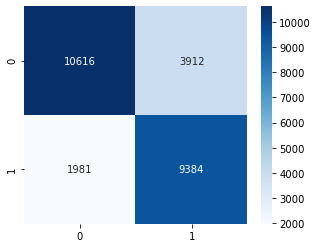

In [158]:

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
prediction = logistic_reg.predict(x_test)
accuracy = logistic_reg.score(x_test, y_test)
print('The accuracy for Logistic regression is:'+str(accuracy))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, prediction), cmap = "Blues", annot=True, fmt = '.0f')

In [171]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_iter': [1000, 1500],
    'hidden_layer_sizes': [(10,10,10)],
    'alpha': [.0001, .005],
    'batch_size':[1,10]
}

Accuracy Score using GaussianNB: 0.8433167265284054


<AxesSubplot:title={'center':'Confusion Matrix'}>

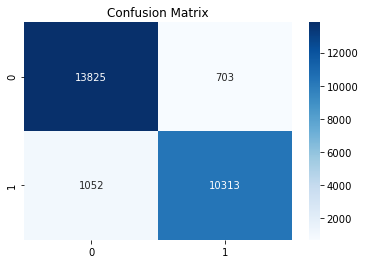

In [166]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)
print("Accuracy Score using GaussianNB:",accuracyscore)
confusion_matrix(y_test,pred)
plt.title("Confusion Matrix")
sns.heatmap(cmatrix, cmap = "Blues", annot=True, fmt = '.0f')

<AxesSubplot:title={'center':"Information Gain between features and 'Satisfaction'"}, ylabel='Features'>

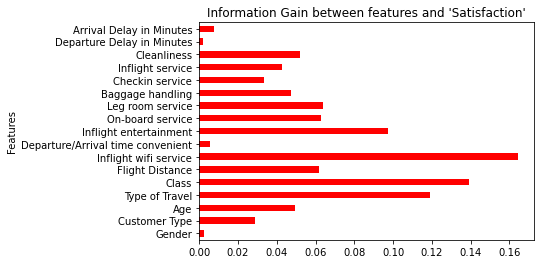

In [205]:
from sklearn.feature_selection import mutual_info_classif


importances=mutual_info_classif(x_train,y_train)
imp_features=pd.Series(importances, x.columns)
imp_features.plot(kind='barh',ylabel='Information gain',
                  xlabel='Features',
                  title="Information Gain between features and 'Satisfaction'",color='red')


Achieved 93% accuracy using Multilayer Perceptron Classifier (Above)
'Inflight Wifi service' had the most information gain with the 'Satisfaction' of the passengers.